# Project 1: A rule based chatbot
+ student name: Henry Liu Bo Chen
+ student id: 22672083 22672145

## Data Exploration
Firstly, we load the dataset and see what it looks like.

In [1]:
# Import the packages we will use
import spacy
import pandas as pd
import numpy as np
import pickle 

In [2]:
CSV_FILE_PATH = './seek_australia.csv'
df = pd.read_csv(CSV_FILE_PATH)
print(df.describe())# view the data description

                 category    city        company_name    geo job_board  \
count               30000   30000               30000  30000     30000   
unique                 30      65                9054      1         1   
top     Trades & Services  Sydney  Private Advertiser     AU      seek   
freq                 3346    9412                1491  30000     30000   

                                          job_description  \
count                                               29655   
unique                                              26850   
top      Today we have around 250 people who work to h...   
freq                                                  101   

                           job_title   job_type             post_date  \
count                          30000      30000                 30000   
unique                         20979          4                 24747   
top     Business Development Manager  Full Time  2018-04-16T09:29:00Z   
freq                           

In [3]:
# Define a function to see unique Job categories in the dataset for each city
def get_city_category(city):
    df_temp=df[df['city']==city].loc[:,'category']
    num=len(df_temp)
    df_temp=df_temp.value_counts()
    df_temp/=num
    return df_temp
get_city_category('ACT')# see one city, take ACT as an example

Information & Communication Technology    0.221719
Government & Defence                      0.164027
Trades & Services                         0.067873
Administration & Office Support           0.061086
Healthcare & Medical                      0.057692
Accounting                                0.050905
Education & Training                      0.047511
Construction                              0.033937
Hospitality & Tourism                     0.032805
Retail & Consumer Products                0.030543
Community Services & Development          0.027149
Human Resources & Recruitment             0.026018
Manufacturing, Transport & Logistics      0.026018
Marketing & Communications                0.021493
Sales                                     0.020362
Real Estate & Property                    0.018100
Banking & Financial Services              0.015837
Legal                                     0.014706
Engineering                               0.013575
Call Centre & Customer Service 

In [4]:
pd.crosstab(df['category'],df['city']).apply(lambda x:x/x.sum(),axis=0)# see job categories across cities

city,ACT,Adelaide,Adelaide Hills & Barossa,Albany & Great Southern,Albury Wodonga & Murray,Alice Springs & Central Australia,Bairnsdale & Gippsland,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,...,Tamworth & North West NSW,Toowoomba & Darling Downs,Townsville & Northern QLD,Traralgon & La Trobe Valley,"Tumut, Southern Highlands & Snowy",Wagga Wagga & Riverina,Whyalla & Eyre Peninsula,"Wollongong, Illawarra & South Coast",Yarra Valley & High Country,Yorke Peninsula & Clare Valley
category,,,,,,,,,,,,,,,,,,,,,
Accounting,0.050905,0.057741,0.000000,0.000000,0.056338,0.023256,0.025974,0.030303,0.008850,0.017094,...,0.009709,0.02500,0.022321,0.000000,0.133333,0.052083,0.000000,0.021739,0.038462,0.04
Administration & Office Support,0.061086,0.064435,0.025641,0.076923,0.084507,0.069767,0.077922,0.070707,0.053097,0.051282,...,0.087379,0.06250,0.058036,0.017857,0.000000,0.031250,0.046512,0.026087,0.019231,0.08
"Advertising, Arts & Media",0.002262,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.020202,0.008850,0.000000,...,0.000000,0.00625,0.004464,0.000000,0.000000,0.010417,0.000000,0.000000,0.000000,0.00
Banking & Financial Services,0.015837,0.019247,0.000000,0.000000,0.056338,0.046512,0.000000,0.030303,0.026549,0.008547,...,0.058252,0.03125,0.022321,0.000000,0.066667,0.020833,0.069767,0.034783,0.000000,0.00
CEO & General Management,0.006787,0.003347,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.008850,0.000000,...,0.019417,0.00000,0.004464,0.000000,0.000000,0.010417,0.023256,0.004348,0.000000,0.04
Call Centre & Customer Service,0.009050,0.021757,0.025641,0.000000,0.014085,0.000000,0.000000,0.040404,0.000000,0.008547,...,0.000000,0.00000,0.004464,0.035714,0.000000,0.000000,0.023256,0.004348,0.000000,0.04
Community Services & Development,0.027149,0.035146,0.102564,0.076923,0.028169,0.116279,0.012987,0.060606,0.053097,0.042735,...,0.116505,0.08750,0.058036,0.196429,0.000000,0.031250,0.116279,0.104348,0.134615,0.04
Construction,0.033937,0.035983,0.000000,0.076923,0.070423,0.000000,0.000000,0.020202,0.000000,0.008547,...,0.029126,0.05000,0.040179,0.017857,0.000000,0.031250,0.139535,0.039130,0.038462,0.08
Consulting & Strategy,0.002262,0.004184,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.025641,...,0.000000,0.00000,0.004464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


The vocabulary size of Sales is 20176.
The word frequencies of Sales is:


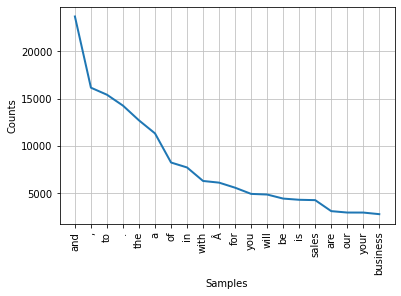

In [15]:
import nltk
from nltk.book import FreqDist
from nltk.book import *
# Define a function to see unique Job categories in the dataset for each city
def get_category_frequency(category,size):
    df_temp=df[df['category']==category].loc[:,'job_description'] 
    tokens=[]
    for elem in df_temp:
        tokens+=(nltk.word_tokenize(str(elem)))
    text=nltk.Text(tokens)
    frequency=FreqDist(text)
    print('The vocabulary size of %s is %d.'%(category,len(frequency)))
    print('The word frequencies of %s is:'%(category))
    if len(frequency)>size:        
        frequency.plot(size)
    else:
        frequency.plot(len(frequency))
    
get_category_frequency('Sales',20)# see one category, take Sales as an example    

The vocabulary size of Retail & Consumer Products is 13872.
The word frequencies of Retail & Consumer Products is:


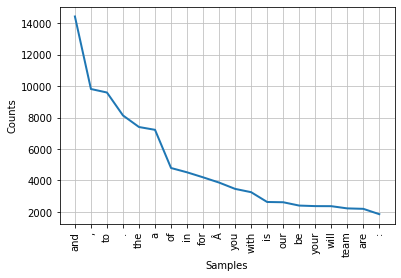

The vocabulary size of Government & Defence is 18308.
The word frequencies of Government & Defence is:


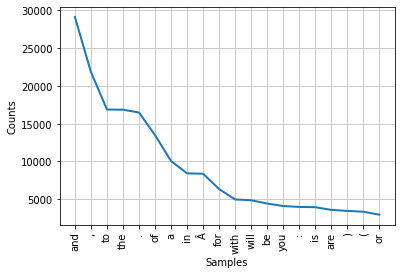

The vocabulary size of Trades & Services is 28189.
The word frequencies of Trades & Services is:


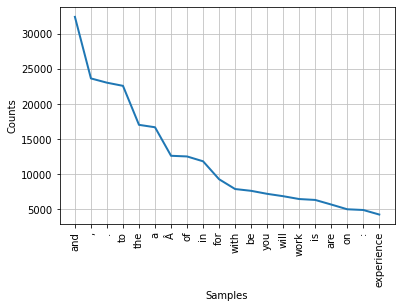

The vocabulary size of Manufacturing, Transport & Logistics is 22666.
The word frequencies of Manufacturing, Transport & Logistics is:


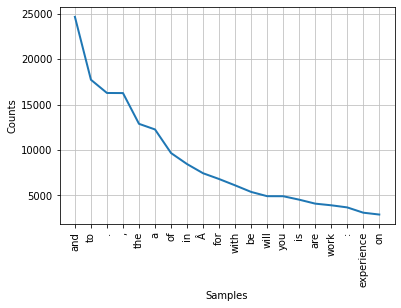

The vocabulary size of Sales is 20176.
The word frequencies of Sales is:


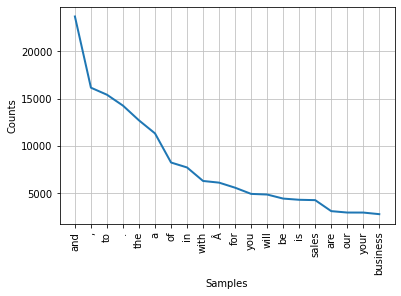

In [16]:
# Visualize vocabularies of first 5 categories
category_list=df.loc[:,'category'].drop_duplicates(keep='first')
for elem in category_list[0:5]:
    get_category_frequency(elem,20)

## Data Prepreocessing
Next, I will make some data prepreocessing for job descriptions

In [61]:
# Define a function to get vocabulary size
import nltk
from nltk.book import *
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

job_corpus={}
job_tokens={}
job_list=pd.DataFrame(df['category'].drop_duplicates(keep='first'))
# Initialize
for elem in job_list.iterrows():
#     job_corpus[str(elem[1]['category'])]=[]
    job_tokens[str(elem[1]['category'])]=[]
for elem in df.loc[:,'category':'job_description'].iterrows():
#     job_corpus[str(elem[1]['category'])].append(str(elem[1]['job_description']))
    job_tokens[str(elem[1]['category'])].append(nltk.word_tokenize(str(elem[1]['job_description'])))
    
# stop_words = stopwords.words('english')

job_list=np.ravel(job_list.values.tolist())
job_corpus={}
for key in job_tokens:
    job_corpus[key]=[]
    for doc in job_tokens[key]:
        job_corpus[key].append(nltk.Text(doc))

def get_vocabulary_size(corpus,step):
    vocab=pd.DataFrame(index=job_list,columns=[step])
    for key in corpus:
        temp=[]
        for elem in corpus[key]:
            temp+=elem.tokens
        vocab.loc[key,step]=len(set(temp))
    return vocab
res=get_vocabulary_size(job_corpus,'tokenize')

lemmatizer = WordNetLemmatizer() 
lem_corpus={}
for key in job_corpus:
    lem_corpus[key]=[]
    for doc in job_corpus[key]:
        lem_corpus[key].append(nltk.Text([lemmatizer.lemmatize(word) for word in doc.tokens]))
res=pd.concat([res,get_vocabulary_size(lem_corpus,'lemmatize')],axis=1)
 
stem = PorterStemmer()   
stem_corpus={}
for key in lem_corpus:
    stem_corpus[key]=[]
    for doc in lem_corpus[key]:
        stem_corpus[key].append(nltk.Text([stem.stem(word) for word in doc.tokens]))
res=pd.concat([res,get_vocabulary_size(stem_corpus,'stemming')],axis=1) 

stop_words = stopwords.words('english')
# stop_corpus={}
# for key in stem_corpus:
#     stop_corpus[key]=[]
#     for doc in stem_corpus[key]:
#         stop_corpus[key].append(nltk.Text([w for w in doc.tokens if w not in stop_words]))
# res=pd.concat([res,get_vocabulary_size(stop_corpus,'stopwords')],axis=1)     
res

,tokenize,lemmatize,stemming
Retail & Consumer Products,13872,13063,8395
Government & Defence,18308,17307,12040
Trades & Services,28189,26787,18006
"Manufacturing, Transport & Logistics",22666,21419,14182
Sales,20176,19009,12437
Community Services & Development,13787,13059,8921
Healthcare & Medical,25410,24302,17164
Information & Communication Technology,29175,27834,19138
"Mining, Resources & Energy",13450,12671,8242
Construction,16760,15842,10389


In [128]:
res=[]

In [95]:
len(list(stem_corpus['Sales'][0].tokens)+list(stem_corpus['Sales'][1]))

1107

In [17]:
#Create corpus for each category and tokenize,
from spacy.tokens.doc import Doc
from spacy.vocab import Vocab
import spacy
nlp = spacy.load("en_core_web_sm")
# df_temp=df['job_description']
job_list=pd.DataFrame(df['category'].drop_duplicates(keep='first'))

job_corpus={}
job_count={}
job_index={}#category to original index

# Initialize
for elem in job_list.iterrows():
    job_corpus[str(elem[1]['category'])]=[]
    job_count[str(elem[1]['category'])]=0
    job_index[str(elem[1]['category'])]=[]

for elem in df.loc[:,'category':'job_description'].iterrows():
#     if(job_count[str(elem[1]['category'])]>=10):
#         continue
    job_corpus[str(elem[1]['category'])].append(nlp(str(elem[1]['job_description'])))
    job_index[str(elem[1]['category'])].append([len(job_corpus[str(elem[1]['category'])])-1,elem[0]])
    job_count[str(elem[1]['category'])]+=1

In [151]:
#Define a function to retokenize doc
def get_vocabulary_size(corpus,step):
    vocab=pd.DataFrame(index=job_list,columns=[step])
    for key in corpus:
        temp=[]
        for elem in corpus[key]:
            temp+=[str(tok.text) for tok in elem]
        vocab.loc[key,step]=len(set(temp))
    return vocab
res=get_vocabulary_size(job_corpus,'tokenize')

In [152]:
res

,tokenize
Retail & Consumer Products,12960
Government & Defence,16992
Trades & Services,25476
"Manufacturing, Transport & Logistics",20488
Sales,18305
Community Services & Development,12757
Healthcare & Medical,23017
Information & Communication Technology,25372
"Mining, Resources & Energy",12502
Construction,15246


In [139]:
lemm_corpus={}
for key in job_corpus:
    lemm_corpus[key]=[]
    for elem in job_corpus[key]:
        lemm_corpus[key].append([token.lemma_ for token in elem])
res=pd.concat([res,get_vocabulary_size(lemm_corpus,'lemmatize')],axis=1)
res

,tokenize,lemmatize
Retail & Consumer Products,12960,10816
Government & Defence,16992,14724
Trades & Services,25476,22507
"Manufacturing, Transport & Logistics",20488,17637
Sales,18305,15522
Community Services & Development,12757,10948
Healthcare & Medical,23017,20504
Information & Communication Technology,25372,22407
"Mining, Resources & Energy",12502,10614
Construction,15246,12975


In [140]:
pd.concat([res,get_vocabulary_size(lem_corpus,'lemmatize')],axis=1)

,tokenize,lemmatize,lemmatize
Retail & Consumer Products,12960,10816,25314
Government & Defence,16992,14724,38035
Trades & Services,25476,22507,67083
"Manufacturing, Transport & Logistics",20488,17637,52321
Sales,18305,15522,47279
Community Services & Development,12757,10948,27575
Healthcare & Medical,23017,20504,61943
Information & Communication Technology,25372,22407,82221
"Mining, Resources & Energy",12502,10614,26543
Construction,15246,12975,35793


In [4]:
with open('spacy_doc.pkl', 'wb') as f:
#     data = {'0':1, '1':2}
    pickle.dump(job_corpus, f)

In [146]:
with open('spacy_doc.pkl', 'rb') as f:
    job_corpus = pickle.load(f)

In [74]:
#Define a function to retokenize doc
import spacy
nlp = spacy.load('en_core_web_sm')

def retokenize(doc):
    # Retokenize to treat each noun_chunk as a single token
#     doc=nlp(doc)
    with doc.retokenize() as retokenizer:  
        for chunk in doc.noun_chunks:
#             print(chunk.text + ' ' + str(type(chunk)))
            retokenizer.merge(chunk)
    return doc

In [83]:
re_corpus={}
for key in job_corpus:
    re_corpus[key]=[]
    for elem in job_corpus[key]:
        doc=retokenize(elem)
        re_corpus[key].append([token.lemma_ for token in doc])

In [75]:
#Lemmatize and compare with stemming, 
# from nltk.stem import WordNetLemmatizer  
# lemmatizer = WordNetLemmatizer()  
lem_corpus={}

for key in job_corpus:
    lem_corpus[key]=[]
    for elem in job_corpus[key]:
        doc=retokenize(elem)
        lem_corpus[key].append([token.lemma_ for token in doc if token.is_stop==False and token.is_punct==False])

# print('Vocabulary size for job descriptions after lemmatization is',get_vocabulary_size(lem_corpus))

KeyboardInterrupt: 

In [7]:
with open('spacy_lem.pkl', 'wb') as f:
#     data = {'0':1, '1':2}
    pickle.dump(lem_corpus, f)

In [76]:
with open('spacy_lem.pkl', 'rb') as f:
    lem_corpus = pickle.load(f)

In [120]:
# Define a function to get vocabulary size
from nltk.book import *
def get_vocabulary_size_spacy(corpus,step):
    vocab=pd.DataFrame(index=job_list,columns=[step])
    for key in corpus:
        temp=[]
        for elem in corpus[key]:
            temp+=[str(tok) for tok in elem]
        vocab.loc[key,step]=len(set(temp))
    return vocab
res=pd.concat([res,get_vocabulary_size_spacy(re_corpus,'retokenize')],axis=1) 
res=pd.concat([res,get_vocabulary_size_spacy(lem_corpus,'stopwords')],axis=1) 
res

,tokenize,lemmatize,stemming,retokenize,stopwords
Retail & Consumer Products,13872,13063,8395,25564,25314
Government & Defence,18308,17307,12040,38292,38035
Trades & Services,28189,26787,18006,67373,67083
"Manufacturing, Transport & Logistics",22666,21419,14182,52595,52321
Sales,20176,19009,12437,47548,47279
Community Services & Development,13787,13059,8921,27822,27575
Healthcare & Medical,25410,24302,17164,62236,61943
Information & Communication Technology,29175,27834,19138,82536,82221
"Mining, Resources & Energy",13450,12671,8242,26785,26543
Construction,16760,15842,10389,36066,35793


In [35]:
# job_corpus={}
# for key in lem_corpus:
#     job_corpus[key]=[]
#     for doc in lem_corpus[key]:
#         job_corpus[key].append(str(Doc(Vocab(), words = doc)))
job_corpus=lem_corpus

In [16]:
print(job_corpus['Sales'][0])

[' ', 'the company', 'yatesâ', '\xa0', 'Australia', "New Zealand's lead home garden brand", 'take', 'pride', 'provide', 'horticultural innovation', 'expertise', 'second', 'â', '\xa0 ', 'this iconic australian company', 'the wide DuluxGroup - ASX top', '100', 'list', 'a well-deserve reputation', 'a great place', 'work', 'join', 'yate', 'step', 'an enjoyable and professional work environment', 'your hard work', 'value', 'reward', 'recognise', 'the vital role', 'our employee', 'play', 'our continue success', 'Role', 'Reporting', 'the National Sales Manager Yates', 'work', 'collaboratively', 'a high perform sale and marketing team', 'an exciting opportunity', 'a skilled and experience National Account Manager', 'thrive', 'work', 'a fast-pace environment', 'manage', 'develop', 'the Yates relationship', 'the Grocery and Mass merchant channel', 'Â', '\xa0 ', 'Broad', 'its responsibility', 'play', 'a pivotal role', 'provide', 'strategic direction', 'control', 'business activity', 'nationally',

In [123]:
# #Define a function to retokenize doc
# import spacy
# nlp = spacy.load('en_core_web_sm')

# def retokenize(doc):
#     # Retokenize to treat each noun_chunk as a single token
#     doc=nlp(doc)
#     with doc.retokenize() as retokenizer:  
#         for chunk in doc.noun_chunks:
# #             print(chunk.text + ' ' + str(type(chunk)))
#             retokenizer.merge(chunk)
#     return doc

In [14]:
#Stemming
# from nltk.stem.porter import PorterStemmer
# stem = PorterStemmer() 
# stem_corpus={}

# for key in job_corpus:
#     stem_corpus[key]=[]
#     for doc in job_corpus[key]:
#         stem_corpus[key].append(nltk.Text([stem.stem(word) for word in doc.tokens]))

# print('Vocabulary size for job descriptions after stemming is',get_vocabulary_size(stem_corpus))

In [36]:
#Define a function to get tfidf for each category
import spacy
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import numpy as np

def get_tfidf(category):
    '''
    choose one category to parse
    '''
    doc_tokenized = list(job_corpus[category])
    dictionary = Dictionary()
    BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
    tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
    vocab = [dictionary[i] for i in range(len(dictionary))]
    index = list(range(len(BoW_corpus)))
    tfidf_df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                      index=index,
                      columns=vocab)
    for idx in index:
        for id, freq in tfidf[BoW_corpus[idx]]:
            tfidf_df[dictionary[id]][idx] = freq
    return tfidf_df

In [10]:
# Retokenize frequent noun phrases (you can set the frequency threshold yourself), and
import spacy
nlp = spacy.load('en_core_web_sm')

tf_corpus=[]
for key in job_corpus:
    for doc in job_corpus[key]:
#         doc=retokenize(doc)
#         tf_corpus.append(str(doc))
        tf_corpus.append(doc)
# print(tf_corpus[0])

In [ ]:
# Remove stop words (rank words according to TF/IDF). 
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# filtered_tokens = [w for w in stem_tokens if not w in stop_words]

In [12]:
# Group the job descriptions in a corpus,
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

# doc_tokenized = list(sent_to_words(tf_corpus))
doc_tokenized = list(tf_corpus)
dictionary = Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
# BoW_corpus
# for doc in BoW_corpus:
#     print([[dictionary[id], freq] for id, freq in doc])

E:\Anaconda\envs\NLP\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [13]:
import numpy as np
tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
vocab = [dictionary[i] for i in range(len(dictionary))]
index = list(range(len(BoW_corpus)))
tfidf_df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                  index=index,
                  columns=vocab)
for idx in index:
    for id, freq in tfidf[BoW_corpus[idx]]:
        tfidf_df[dictionary[id]][idx] = freq
tfidf_df
# Now a friendlier print out
# for doc in tfidf[BoW_corpus]:
#     print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])
# 'Retail & Consumer Products'

MemoryError: Unable to allocate 29.4 GiB for an array with shape (30000, 526197) and data type float16

In [65]:
tfidf_df={}
for key in job_corpus:
    tfidf_df[key]=get_tfidf(key)

In [66]:
with open('tfidf_df.pkl', 'wb') as f:
#     data = {'0':1, '1':2}
    pickle.dump(tfidf_df, f)

In [7]:
with open('tfidf_df.pkl', 'rb') as f:
    tfidf_df = pickle.load(f)

In [8]:
tfidf_df['Sales']

,,03,100,4+ year' experience,5688,9263,Australia,Blitzem,Broad,Business,...,our new combined business,our shared desire,required timeline,similar etl tool,slaâ€™s Prior Reporting Analyst experience,stakeholder management skill,the Business sale Reporting Analyst role,the large logistics provider,the large parcel,the premium service standard
0,0.003763,0.045624,0.057983,0.094849,0.094849,0.080566,0.017487,0.085815,0.094849,0.041138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004971,0.000000,0.000000,0.000000,0.000000,0.000000,0.023087,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043671,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.002800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1460,0.006157,0.000000,0.000000,0.000000,0.000000,0.000000,0.057190,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1461,0.004467,0.000000,0.000000,0.000000,0.000000,0.000000,0.020752,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1462,0.008507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
# Find top 100 tokens for each job and extract entities
import re
def extract_entity(category):
    exp_list=[]
    for i in range(len(tfidf_df[category])):
        temp_list=[]
        tfidf_np=tfidf_df[category].to_numpy()
        index=np.argsort(tfidf_np[i])[-100:-1]
        for j in range(len(index)-1,0,-1):
    #         print(tfidf_df.columns[index[j]])
            if re.match(r'.*experience.*', str(tfidf_df[category].columns[index[j]])):
#                 print(job_index[category][i][0],tfidf_df[category].columns[index[j]])
                temp_list.append(str(tfidf_df[category].columns[index[j]]))
        exp_list.append(temp_list)
    return exp_list
# extract_entity('Retail & Consumer Products')

In [14]:
exp_dict={}
for key in tfidf_df:
    exp_dict[key]=extract_entity(key)

In [250]:
# Define a function to assemble JSON objects
import json
def get_json(exp_dict,data):
    df_json = pd.DataFrame(columns = ['json'],index = [i for i in range(len(df))]) 
    for key in exp_dict:      
        for i in range(len(exp_dict[key])):
            j=job_index[key][i][1]
            json_obj={'job name': data.iloc[j,6],'job type': data.iloc[j,7],'job category': data.iloc[j,0],'location':data.iloc[j,1],'company':data.iloc[j,2],'salary':data.iloc[j,9],'experience': exp_dict[key][i]}
            df_json.iloc[j]=json.dumps(json_obj)
    return df_json
    
df_json=get_json(exp_dict,df)

In [251]:
# print(df_json.iloc[27000,0])
with open('df_json.pkl', 'wb') as f:
    pickle.dump(df_json, f)

In [20]:
# with open('df_json.pkl', 'rb') as f:
#     df_json = pickle.load(f)
print(df_json.iloc[27000,0])

{"job name": "Senior Systems Engineer", "job type": "Contract/Temp", "job category": "Information & Communication Technology", "location": "Perth", "company": "Michael Page Technology", "salary": NaN, "experience": ["an experienced Systems Engineer", "experience", "\u00c2\u00a0 Testing experience"]}


In [39]:
import numpy as np
tfidf_np=tfidf_df.to_numpy()
index = np.argsort(tfidf_np.ravel())[-100:-1]
pos = np.unravel_index(index, tfidf_np.shape)
pos=np.column_stack(pos)
print(pos)

[[  853     2]
 [  668  6500]
 [  373   466]
 [  137  5763]
 [  555   309]
 [  177  7052]
 [  836 19657]
 [  729 20310]
 [  448   178]
 [   81  3232]
 [  167  6824]
 [  250  8924]
 [  250  8923]
 [  250  8922]
 [  235   178]
 [  945  1780]
 [  889 23090]
 [  922 21271]
 [  128  3232]
 [  463   720]
 [  493 15094]
 [  839 13599]
 [   99  4512]
 [  844  8354]
 [  449 14031]
 [  827 12594]
 [  395 12594]
 [  883 12594]
 [  543 12594]
 [  505   178]
 [   48  2662]
 [  704 14263]
 [  962 19931]
 [  235  1780]
 [  470  3232]
 [  232  8387]
 [  555   178]
 [  969 25008]
 [  316  9586]
 [  519   178]
 [  405  1430]
 [  105  4140]
 [  936 12157]
 [  505   309]
 [  278  9586]
 [   85  4140]
 [  189   309]
 [  519   309]
 [  800   309]
 [  240  8354]
 [  493 15075]
 [  343  8925]
 [  179  7106]
 [  339  8925]
 [  251  8925]
 [  607  3866]
 [  448  1780]
 [  314  1780]
 [  701   178]
 [  709  8354]
 [  469 14533]
 [  574   178]
 [  121   178]
 [  181  3232]
 [  541   178]
 [  701   309]
 [  574   

In [50]:
print(tfidf_np[pos[1][0]][pos[1][1]])
tfidf_df.columns[1219]

0.4048


'thrill'

In [49]:
index1 = np.argsort(tfidf_np[20])[-100:-1]
for i in range(98,0,-1):
#     print(tfidf_np[1,index1[i]])
    print(tfidf_df.columns[index1[i]])
# print(tfidf_df.columns[index1[-5]])
# print(tfidf_np[0][index1[-5]])

Mentos
premium household consumer brand
POS placement
Stuart Alexander
core range distribution
Tabasco
display â
introduction
Â â  key performance measure
key promotional programme
optimum position
the territory â
Wednesdayâ€™
the companyâ€™s field sale objective
our Queensland field sale team
the Grocery area
Ocean Spray
careers@stalex.com.au
approximately 7 hour
a short letter
a dynamic casual sale merchandiser
a lead importer
a motivated self-starter Â· Proven experience
Big W
CRM system Â
Chupa Chups
Hermesetas
a reliable motor vehicle
Wertherâ€
Duracell
Fishermanâ€™s Friends
Guylian
a FMCG sale environment
Caltex
the Townsville area
Coles Express
ordination
computer skill
distributor
store level
â
IGA
all product
Woolworths
co
multiple channel
a diverse range
shelf
a can-do attitude
BP
Â
the implementation
include
confidence
the experience
s
gain
Target
accountable
Coles
the year
preferably
an individual
promotion
close
excellent
seek
access
cover
live
submit
communication
your re

In [23]:
# print(df.iloc[1222,5])
# for key in job_corpus:
#     print(key)
print(job_corpus['Retail & Consumer Products'][18])

[' ', 'work', 'a supportive environment', 'structured training', 'induction', 'continue', 'your career development', 'Join Australia\'s "Sleepwear king', 'Peter Alexander', 'his successful brand', 'the just Groupâ€™s 7 amazing brand', 'advance', 'your career', 'the next level', 'reward', 'performance', 'receive', '50%', 'staff discount', "Peter's amazing product", 'â', '\xa0', 'PETER ALEXANDER', 'the brand Peter Alexander', 'a live breathing person', 'actively', 'involve', 'the development', 'his exclusive, unique and welcome store', 'the moment', 'walk', 'a Peter Alexander store', 'evoke', 'a feeling', 'laughter', 'entertainment', 'a place', 'feel', 'comfortable', 'warm', 'home', 'Peter', 'a huge supporter', 'animal welfare organisation', 'work', 'closely', 'the Royal Society', 'the Prevention', 'Cruelty', 'Animals', 'RSPCA', 'Peter', 'thrill', 'ask', 'their â€œsuperheroâ€\x9d', 'regularly', 'promote', 'the wonderful cause', 'his store', 'the ROLE', 'currently', 'a rare and exciting o

In [111]:
# Parse each job description,
from spacy.matcher import Matcher
from spacy.tokens import Doc,Span,Token
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
pattern=[
    [{"DEP":"nummod"},{"DEP":"dobj"},{"DEP":"prep"},{"TEXT":"experience"}],
    [{"DEP":"nummod"},{"TEXT":"years"},{"DEP":"prep"},{"TEXT":"experience"}],
    [{"DEP":"det"},{"TEXT":"experience"}],
    [{"DEP":"nummod"},{"DEP":"compound"},{"TEXT":"experience"}],
    [{"DEP":"nummod"},{"TEXT":"years"},{"DEP":"case"},{"TEXT":"experience"}],
    [{"DEP":"nummod"},{"TEXT":"year"},{"DEP":"case"},{"TEXT":"experience"}],
    [{"DEP":"amod"},{"TEXT":"experience"},{"DEP":"prep"},{"POS":"PROPN"}],
    [{"POS":"NOUN"},{"POS":"NOUN"},{"TEXT":"experience"}],
    [{"DEP":"amod"},{"POS":"NOUN"},{"TEXT":"experience"}],
    [{"TEXT":"experience"},{"DEP":"prep"},{"DEP":"det"},{"POS":"PROPN"}],
    [{"TEXT":"experience"},{"DEP":"prep"},{"POS":"PROPN"}]
    ]
matcher.add("jobPattern", pattern)
doc = nlp(df.iloc[1222,5])
matches = matcher(doc)
for match_id, start, end in matches:
    span=doc[start:end]
    print("Span: ",span.text)
    print(type(span.text))

In [62]:
nn=nlp('At least 3 years\' experience')
print(nn[5])

experience


## Linguistic Patterns

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def dep_pattern(doc):
    for i in range(len(doc)-1):
        if doc[i].dep_ == 'nsubj' and doc[i+1].dep_ == 'aux' and doc[i+2].dep_ == 'ROOT':
            for tok in doc[i+2].children:
                if tok.dep_ == 'dobj':
                    return True
    
    return False

In [ ]:
doc = nlp(u'I might send them a card as a reminder.')

In [ ]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# pattern = [[{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}],
#           [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
#           ]
matcher.add("NsubjAuxRoot", pattern)
doc = nlp("Find me a job for Accountant in Sydney.")
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print("Span: ", span.text)
    print("The positions in the doc are: ", start, "-", end)
    print("Match ID ", match_id)
    print(doc.vocab.strings[match_id]) 
    for tok in doc[end-1].children:
        if tok.dep_ == 'dobj':
            print("The direct object of {} is {}".format(doc[end-1], tok.dep_))   

In [ ]:
from spacy.lang.en import English

# nlp = English()
nlp = spacy.load('en_core_web_sm')
ruler = nlp.add_pipe("entity_ruler")
patterns = [{"label": "ORG", "pattern": "Apple"},
            {"label": "GPE", "pattern": [{"POS": "PROPN"}]}]
ruler.add_patterns(patterns)

doc = nlp("Find me a job for Accountant in Sydney.")
print([(ent.text, ent.label_) for ent in doc.ents])

In [ ]:
# category_list=df['category'].drop_duplicates(keep='first')
# name_list=df['job_title'].drop_duplicates(keep='first')
# city_list=df['city'].drop_duplicates(keep='first')
# print(city_list)

### Patterns

In [354]:
city_list=df.loc[:,'city'].drop_duplicates(keep='first')
city_list=city_list.values.tolist()

In [361]:
from spacy.matcher import Matcher
from spacy.tokens import Doc,Span,Token
def extract_job(str):
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)
    pattern=[
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"pobj"}],
        [{"DEP":"ccomp"},{"DEP":"prep"},{"DEP":"pobj"}],
        [{"DEP":"attr"},{"DEP":"prep"},{"DEP":"pobj"}],
        [{"DEP":"ccomp"},{"DEP":"prep"},{"DEP":"det"},{"DEP":"pobj"}],
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"det"},{"DEP":"pobj"}],
#         [{"DEP":"pobj"},{"DEP":"prep"},{"DEP":"pobj"}]
        ]
    matcher.add("jobPattern", pattern)
    doc = nlp(str)
    doc=retokenize(doc)
    matches = matcher(doc)
    job_list=[]
    for match_id, start, end in matches:
        job=''
        span=doc[start:end]
        for tok in span:
            if tok.dep_=='pobj' and tok.text not in city_list:
                job=tok.text
        if job=='':continue
        job_list.append(job)
    return job_list
# extract_job('I am looking for a job as a software engineer.')
extract_job('I want to find a full-time job as a software engineer in Sydney')

['a software engineer']

In [ ]:
from spacy.matcher import Matcher
from spacy.tokens import Doc,Span,Token
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
pattern=[
    [{"TEXT":"a"},{"TEXT":"job"},{"DEP":"prep"},{"POS": "PROPN"}],
    [{"TEXT":"a"},{"TEXT":"job"},{"DEP":"prep"},{"POS": "PROPN"},{"DEP":"prep"},{"POS": "PROPN"}],
    [{"TEXT":"a"},{"TEXT":"job"},{"DEP":"prep"},{"POS": "NOUN"}]
    ]
matcher.add("locationPattern", pattern)
doc = nlp("Find me a job for Worker in Sydney.")
matches = matcher(doc)
for match_id, start, end in matches:
    span=doc[start:end]
    print("Span: ",span.text)

# for ent in doc.ents:    
#     ent.text=lemmatizer.lemmatize(ent.text)
    
for ent in doc.ents:
    if ent.label_ == 'GPE':
        print(ent.text)

In [376]:
# nlp = spacy.load('en_core_web_sm')
# doc = nlp("I want to find a full-time job as Client Solution Analyst in Brisbane.")
# for ent in doc.ents:
#     if ent.label_ == 'GPE':
#         print(ent.text)

Brisbane


In [393]:
from spacy import displacy
doc = nlp(u'I have ten years of experience in taxation, find me a job.')
doc=retokenize(doc)
displacy.render(doc, style='dep')

In [363]:
def extract_company(str):
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)
    pattern=[
        [{"DEP":"pobj"},{"DEP":"prep"},{"DEP":"pobj"}],
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"pobj"}],
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"compound"},{"DEP":"pobj"}],
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"compound"},{"LOWER":"company"}],
        [{"DEP":"dobj"},{"DEP":"prep"},{"DEP":"compound"},{"DEP":"compound"},{"LOWER":"company"}],
        [{"TEXT":"job"},{"TEXT":"at"},{"DEP":"pobj"}],
        [{"TEXT":"work"},{"TEXT":"at"},{"DEP":"pobj"}],
        ]
    matcher.add("companyPattern", pattern)
    doc = nlp(str)
    doc=retokenize(doc)
    matches = matcher(doc)
    company_list=[]
    for match_id, start, end in matches:
        company=''
        span=doc[start:end]
        for tok in span:
            if tok.dep_=='pobj' and tok.text not in city_list:
                company=tok.text
            if company=='':continue
            company_list.append(company)
    return company_list
        
extract_company("I want a job at Bakers Delight G&M")

['Bakers Delight G&M']

In [127]:
df.loc[:,'job_type'].drop_duplicates(keep='first')

0           Full Time
10      Contract/Temp
19    Casual/Vacation
32          Part Time
Name: job_type, dtype: object

In [266]:
def extract_jobtype(str):
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)
    pattern=[
        [{"LOWER":"full"},{"IS_PUNCT": True},{"LOWER":"time"}],
        [{"LOWER":"part"},{"IS_PUNCT": True},{"LOWER":"time"}],
        [{"LOWER":"full"},{"LOWER":"time"}],
        [{"LOWER":"part"},{"LOWER":"time"}],
        [{"LOWER":"contract"},{"IS_PUNCT": True},{"LOWER":"temp"}],
        [{"LOWER":"casual"},{"IS_PUNCT": True},{"LOWER":"vacation"}],
        [{"LOWER":"contract"}],
        [{"LOWER":"temp"}],
        [{"LOWER":"casual"}],
        [{"LOWER":"vacation"}]
        ]
    matcher.add("jobtypePattern", pattern)
    doc = nlp(str)
    matches = matcher(doc)
    jobtype_list=[]
    for match_id, start, end in matches:
        span=doc[start:end]
#         print("Span: ",span.text)
        jobtype_list.append(span.text)
    # process to match json object
    for i in range(len(jobtype_list)):
        if re.match( r'full', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Full Time'
        if re.match( r'part', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Part Time'
        if re.match( r'contract', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Contract/Temp'
        if re.match( r'temp', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Contract/Temp'
        if re.match( r'casual', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Casual/Vacation'
        if re.match( r'vacation', jobtype_list[i], re.M|re.I):
            jobtype_list[i]='Casual/Vacation'
            
    return jobtype_list
extract_jobtype("I wnat to find a casual time job?")

['Casual/Vacation']

In [264]:
str='Full-time'
if re.match( r'full', str, re.M|re.I):
    print(1)

1


In [245]:
from spacy.matcher import Matcher
from spacy.tokens import Doc,Span,Token
def extract_experience(str):
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)
    pattern=[
        [{"DEP":"nummod"},{"DEP":"dobj"},{"DEP":"prep"},{"LOWER":"experience"}],
        [{"DEP":"det"},{"LOWER":"experience"}],
        [{"DEP":"nummod"},{"DEP":"compound"},{"LOWER":"experience"}],
        [{"DEP":"nummod"},{"DEP":"amod"},{"DEP":"dobj"}]
        ]
    matcher.add("experiencePattern", pattern)
    doc = nlp(str)
    matches = matcher(doc)
    experience_list=[]
    for match_id, start, end in matches:
        span=doc[start:end]
#         print("Span: ",span.text)
        experience_list.append(span.text)
    return experience_list
extract_experience('I have ten years of experience in taxation, find me a job.')

['ten years of experience']

In [364]:
# str='Find me a job for Accountant in Sydney.'
# print(str[str.find('Sydney'):str.find('Sydney')+len('Sydney')])
# Do you have the vacancies for full-time job?
# Are there any vacancies in your company?
# Are there any jobs for cleaners?
# I want to get a part-time job in a restaurant.
# I'd like to have a part-time job.
# Have you got any job for waitress?
# I'm looking for a job with good pay.
# I used to work as a high school teacher for ten years.
# At present I'm employed by HG Company for ten years.
# What's the pay?

import spacy
nlp_loc = spacy.load('en_core_web_sm')
# Specify new label and training data
LABEL = 'LOCATION' 

s1='Find me a job for Accountant in Sydney'
s2='I want to get a part-time job in Melbourne'
s3='I am looking for a job in Gold Coast'
s4='I am find a job in Townsville & Northern QLD'
s5='I want to find a job in Blue Mountains & Central West'
TRAIN_DATA = [(s1,{ 'entities': [(s1.find('Sydney'),s1.find('Sydney')+len('Sydney'), 'LOCATION')] }),
              (s2,{ 'entities': [(s2.find('Melbourne'),s2.find('Melbourne')+len('Melbourne'), 'LOCATION')] }),
              (s3,{ 'entities': [(s3.find('Gold Coast'),s3.find('Gold Coast')+len('Gold Coast'), 'LOCATION')] }),
              (s4,{ 'entities': [(s4.find('Townsville & Northern QLD'),s4.find('Townsville & Northern QLD')+len('Townsville & Northern QLD'), 'LOCATION')] }),
              (s5,{ 'entities': [(s5.find('Blue Mountains & Central West'),s5.find('Blue Mountains & Central West')+len('Blue Mountains & Central West'), 'LOCATION')] }),
              ('I have ten years of experience in taxation, find me a job', 
                { 'entities': [] }),
              ('I like red oranges', { 'entities': []})]
# Add new label to the ner pipe
ner = nlp_loc.get_pipe('ner')
ner.add_label(LABEL)

1

In [384]:
# Train
optimizer = nlp_loc.create_optimizer() 
import random
from spacy.tokens import Doc
from spacy.training import Example
for i in range(25):
    random.shuffle(TRAIN_DATA)
    for text, annotations in TRAIN_DATA:
        doc = Doc(nlp_loc.vocab, words=text.split(" "))
        # We need to create a training example object
        example = Example.from_dict(doc, annotations)
        nlp_loc.update([example], sgd=optimizer)
    
# Test
doc = nlp_loc(u'I want to find a job in Blue Mountains & Central West')
for ent in doc.ents:
    print(ent.text, ent.label_)

Blue Mountains & Central West LOCATION


In [385]:
# Define a function to extract location information
def extract_loc(str):
    doc = nlp_loc(str)
    location_list=[]
    for ent in doc.ents:
#         print(ent.text, ent.label_)
        location_list.append(ent.text)
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(str)
    city_list=[]
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            city_list.append(ent.text)
    for elem in location_list:
        if elem not in city_list:
            location_list.remove(elem)
    return location_list
extract_loc(u'I want to find a full-time job as Client Solution Analyst in Blue Mountains & Central West')

['Blue Mountains & Central West']

In [205]:
#     job_corpus.descriptions[job_corpus.category==elem[1]['category']]+=str(elem[1]['job_description'])
# #     text=nltk.Text(nltk.word_tokenize(str(elem[1]['job_description'])))
#     token=nltk.word_tokenize(str(elem[1]['job_description']))
# #     print(type(token))
#     job_corpus.tokens[job_corpus.category==elem[1]['category']]+=token

## Chatbot Implementation and Deployment

In [252]:
df_json.iloc[27000,0]

'{"job name": "Senior Systems Engineer", "job type": "Contract/Temp", "job category": "Information & Communication Technology", "location": "Perth", "company": "Michael Page Technology", "salary": NaN, "experience": ["an experienced Systems Engineer", "experience", "\\u00c2\\u00a0 Testing experience"]}'

In [410]:
#Define some functions to get target jobs

def get_jobs(str):
    job_list=extract_job(str)
    location_list=extract_loc(str)
#     company_list=extract_company(str)
    company_list=[]
    jobtype_list=extract_jobtype(str)
    experience_list=extract_experience(str) 
#     print(job_list)
#     print(location_list)
#     print(company_list)
#     print(jobtype_list)
#     print(experience_list)
    
#     if (len(job_list)!=0 and len(location_list)!=0) and job_list[0]==location_list[0]:
#         job_list=[]
    
    job=job_list[0] if len(job_list)>0 else False
    location=location_list[0] if len(location_list)>0 else False
    company=company_list[0] if len(company_list)>0 else False
    jobtype=jobtype_list[0] if len(jobtype_list)>0 else False
    experience=experience_list[0] if len(experience_list)>0 else False
    
    results=[]
    
    if job==False and location==False and company==False and jobtype==False and experience==False:
        return results

    
    for elem in df_json.iterrows():
        json_obj=json.loads(elem[1]['json'])
#         flag=True
#         flag=json_obj['job name']==job if job==True else flag
        flag=(json_obj['job name']==job if job!=False else True) and (json_obj['location']==location if location!=False else True) and (json_obj['company']==company if company!=False else True)and (json_obj['job type']==jobtype if jobtype!=False else True) and (json_obj['experience']==experience if experience!=False else True)
        if flag:
#             print(elem[0],json_obj)
            results.append(json_obj)
    return results
        
    
    
# get_jobs('I want to find a full-time job as Client Solution Analyst in Brisbane')
get_jobs('Find me a job for Accountant in Melbourne.')

[{'job name': 'Accountant',
  'job type': 'Part Time',
  'job category': 'Accounting',
  'location': 'Melbourne',
  'company': 'BN Electrical',
  'salary': '$50 - $74.99 per hour',
  'experience': ['relevant working experience',
   "8 year' experience",
   'Excel previous experience']},
 {'job name': 'Accountant',
  'job type': 'Full Time',
  'job category': 'Accounting',
  'location': 'Melbourne',
  'company': '2xm Finance',
  'salary': '$65k - $80k + Super',
  'experience': ['construction and project base accounting experience',
   'experience']},
 {'job name': 'Accountant',
  'job type': 'Full Time',
  'job category': 'Accounting',
  'location': 'Melbourne',
  'company': 'Lawson Delaney',
  'salary': nan,
  'experience': ['your previous experience']},
 {'job name': 'Accountant',
  'job type': 'Full Time',
  'job category': 'Accounting',
  'location': 'Melbourne',
  'company': 'Flavorite Marketing',
  'salary': nan,
  'experience': ['similar solid practical financial accounting exper

In [411]:
def get_response(query,results):
    if len(results)==0:
        return 'Sorry I did not manage to find the information that '+query
    if len(results)==1:
        return 'Good news, I found one job that matches. Here is a summary'+results
    if len(results)>1:
        return 'Good news, I found many jobs that match. Please help me refine the list.'

In [412]:
import spacy
import telegram
from telegram.ext import Updater, MessageHandler, Filters
TOKEN = '5191040810:AAG4zPoujxb97p1yVxoLoFtE8ONxnfm07Wk'
#the callback function that uses spaCy
def utterance(update, context):
    msg = update.message.text
#     nlp = spacy.load('en_core_web_sm')
#     doc = nlp(msg)
#     for token in doc:
#         if token.dep_ == 'dobj':
#             update.message.reply_text('We are processing your request...')
#             return 
#     update.message.reply_text('Please rephrase your request. Be as specific as possible!')
    res=get_response(msg,get_jobs(msg))
    update.message.reply_text(res)

#the code responsible for interactions with Telegram
updater = Updater(TOKEN, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
updater.start_polling()
updater.idle()